<a href="https://colab.research.google.com/github/Thasneemns-2022/Telecom-churn-analysis/blob/main/telecom_churn_analysis_by_thasneem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A customer activity data along with a churn label specifying whether a customer canceled the subscription by the Orange Telecom's Churn Dataset. Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. 
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
# Reading the telecom datset using pandas
url=('https://drive.google.com/file/d/19FfTrGFiIb-Aw-8gNMiggCwLS_65EtpD/view?usp=sharing')
url='https://drive.google.com/uc?id='+url.split('/')[-2]
telecom=pd.read_csv(url)




In [ ]:
# To go through the first 5 indexes of the dataset 
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# To go through the last 5 indexes of the dataset 
telecom.tail()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# Brief Information about the dataset 
telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are 3333 rows and 20 columns.The data types are all numeric values of integer float and boolean of one value.

In [ ]:
telecom.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There is no null values in the dataset.

In [ ]:
telecom[telecom.duplicated()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


There are no duplicate values.

In [ ]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## Churn

In [ ]:
# For getting the total number of customers who have churned

In [ ]:
churning_stats = telecom['Churn'].value_counts()
print(churning_stats)

False    2850
True      483
Name: Churn, dtype: int64


Text(0, 0.5, 'Number of customers')

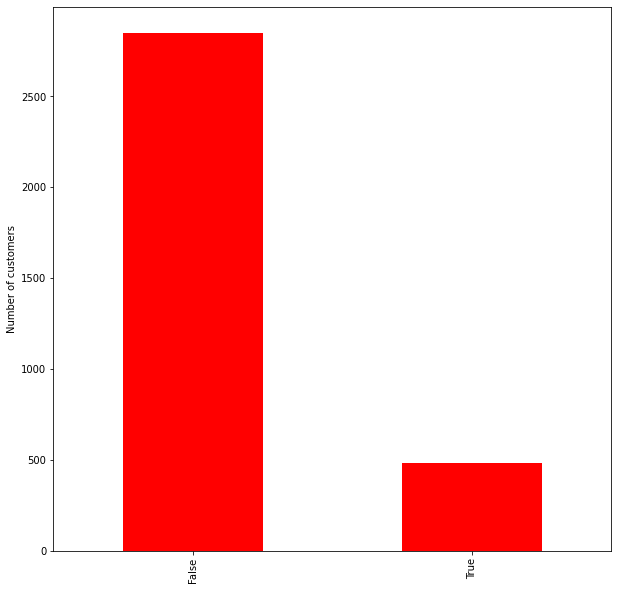

In [ ]:
churning_stats.plot(kind = 'bar', color = 'red') 
plt.ylabel("Number of customers")

Text(0.5, 1.0, 'percenatge of total churned and unchurned customers ')

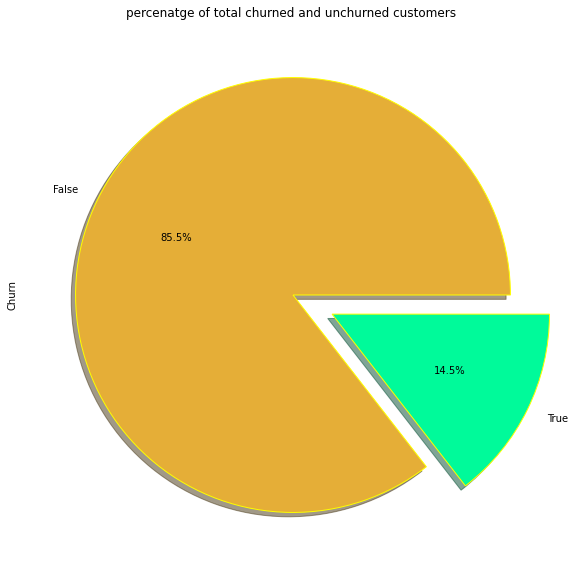

In [ ]:
# for calculate the percentage of total churned and unchurned customers
churning_stats.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'yellow'},colors = ['#e5ae37','#00FA9A'],explode = [0,0.2],shadow = True )
plt.title("percenatge of total churned and unchurned customers ")

14.5% of the customers are churned

#Area Code

In [ ]:
telecom['Area code'].unique()

array([415, 408, 510])

In [ ]:
telecom_areacode = telecom.groupby('Area code')['Churn'].value_counts().unstack()
telecom_areacode

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


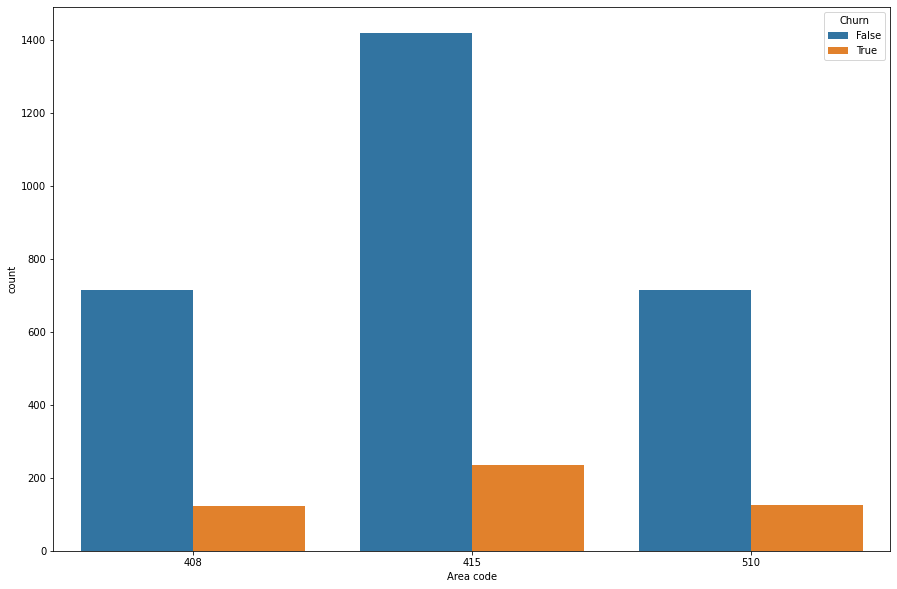

In [ ]:
sns.countplot(x = 'Area code',hue='Churn',data = telecom)

In [ ]:
telecom_areacode['percentage_churn_areacode'] = telecom_areacode.apply(lambda x: x[1]/(x[1]+x[0]) * 100,axis=1)
telecom_areacode

Churn,False,True,percentage_churn_areacode
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


From the given area codes it is difficult to analyze that the percentage of churned is almost the same 

## State




In [ ]:
telecom['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
telecom['State'].nunique()

51

In [ ]:
# Groupby function
state_by_churn = telecom.groupby('State')['Churn'].value_counts().unstack()
state_by_churn

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


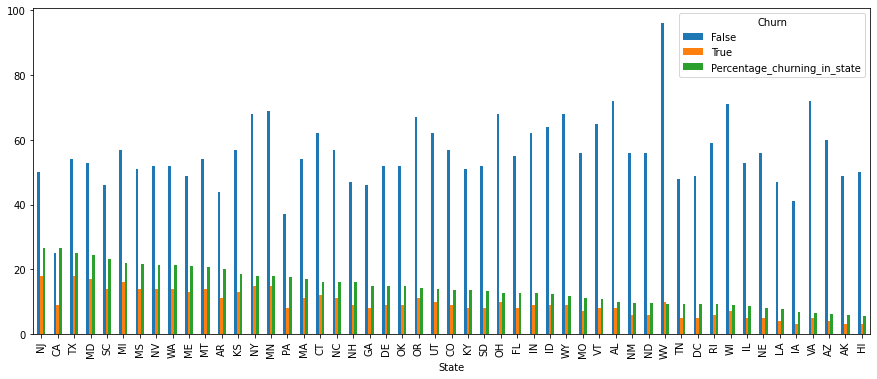

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
state_by_churn.plot(kind = 'bar')

In [ ]:
state_by_churn['Percentage_churning_in_state'] = state_by_churn[True]/(state_by_churn[False] + state_by_churn[True]) * 100
state_by_churn

Churn,False,True,Percentage_churning_in_state
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


In [ ]:
state_by_churn.sort_values(by = 'Percentage_churning_in_state',ascending = False,inplace=True)
state_by_churn.head(3)

Churn,False,True,Percentage_churning_in_state
State,,,
NJ,50,18,26.470588
CA,25,9,26.470588
TX,54,18,25.000000


The states New Jersey(NJ) and California(CA) having the highest churning rtae followed by Texas(TX)

In [ ]:
telecom_churn_state_percentage = state_by_churn[['Percentage_churning_in_state']]
telecom_churn_state_percentage

Churn,Percentage_churning_in_state
State,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333
MI,21.917808
MS,21.538462
NV,21.212121
WA,21.212121


Text(0, 0.5, 'percenatge of customers churned')

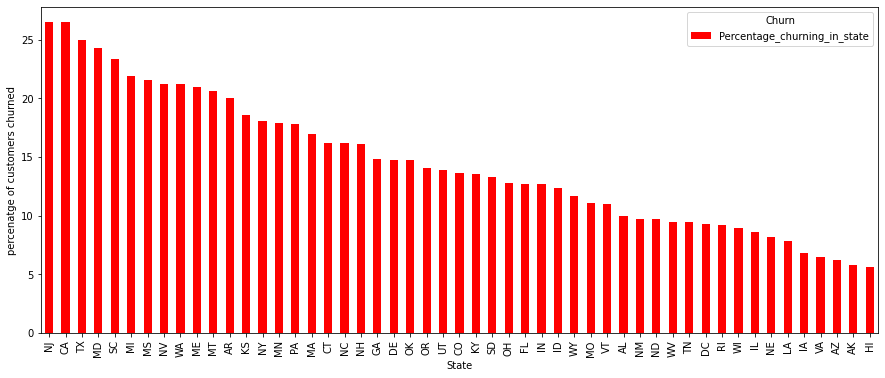

In [ ]:
telecom_churn_state_percentage.plot(kind = 'bar',color = 'red')
plt.ylabel("percenatge of customers churned")

#Account Length

In [ ]:
telecom['Account length'].nunique()

212

In [ ]:
telecom['Account length'].max()

243

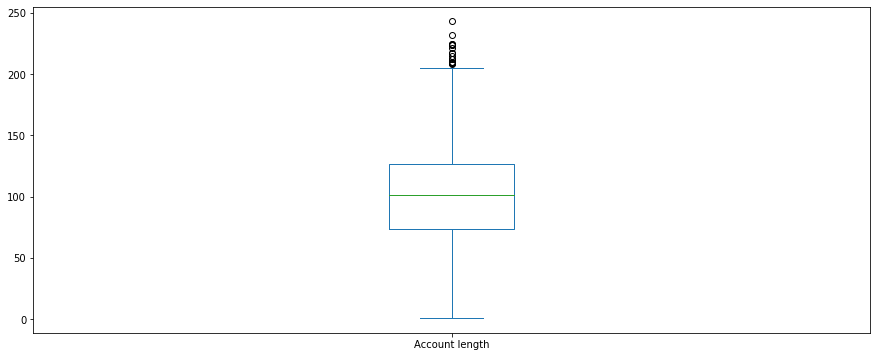

In [ ]:
telecom['Account length'].plot(kind = 'box')

In [ ]:
telecom1 = telecom.loc[:,['Account length','Churn']]

In [ ]:
telecom1.head()

,Account length,Churn
0,128,False
1,107,False
2,137,False
3,84,False
4,75,False


In [ ]:
telecom1['Account length category'] = pd.cut(telecom1['Account length'],bins = [0,60,120,180,240,300],labels = ['0-60','60-120','120-180','180-240','240-300'])

In [ ]:
telecom1.head()

,Account length,Churn,Account length category
0,128,False,120-180
1,107,False,60-120
2,137,False,120-180
3,84,False,60-120
4,75,False,60-120


Text(0.5, 1.0, 'churn difference in various account length categories')

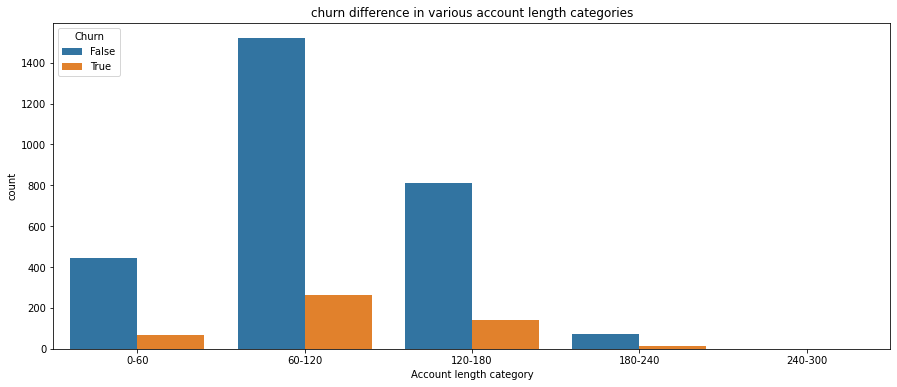

In [ ]:
sns.countplot(x= 'Account length category',hue = 'Churn',data = telecom1)
plt.title('churn difference in various account length categories')

In [ ]:
telecom1_account_length = telecom1.groupby('Account length category')['Churn'].value_counts().unstack()
telecom1_account_length

Churn,False,True
Account length category,,
0-60,444.0,67.0
60-120,1520.0,264.0
120-180,811.0,139.0
180-240,74.0,13.0
240-300,1.0,NaN


The maximum number of people churned under the account length category 60-120

In [ ]:
telecom_churn = telecom[telecom['Churn'] == True]
telecom_non_churn = telecom[telecom['Churn'] == False]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'count')

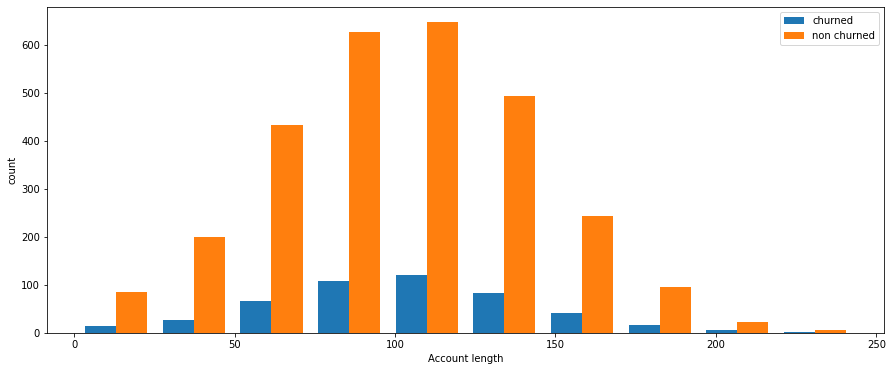

In [ ]:
plt.hist([telecom_churn['Account length'],[telecom_non_churn['Account length']]],label = ['churned','non churned'])
plt.legend()
plt.xlabel('Account length')
plt.ylabel('count')

#Customer Service Calls

In [ ]:
telecom['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
telecom['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
telecom_cust_serv_calls = telecom.groupby('Customer service calls')['Churn'].value_counts().unstack()
telecom_cust_serv_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
telecom_cust_serv_calls.fillna(0,inplace = True)

In [ ]:
telecom_cust_serv_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
telecom_cust_serv_calls['percentage_churning_customer_service_calls'] = telecom_cust_serv_calls.apply(lambda x: x[1]*100/(x[1]+x[0]), axis=1)

In [ ]:
telecom_cust_serv_calls

Churn,False,True,percentage_churning_customer_service_calls
Customer service calls,,,
0,605.0,92.0,13.199426
1,1059.0,122.0,10.330229
2,672.0,87.0,11.462451
3,385.0,44.0,10.256410
4,90.0,76.0,45.783133
5,26.0,40.0,60.606061
6,8.0,14.0,63.636364
7,4.0,5.0,55.555556
8,1.0,1.0,50.000000


Text(0, 0.5, 'churning percentage')

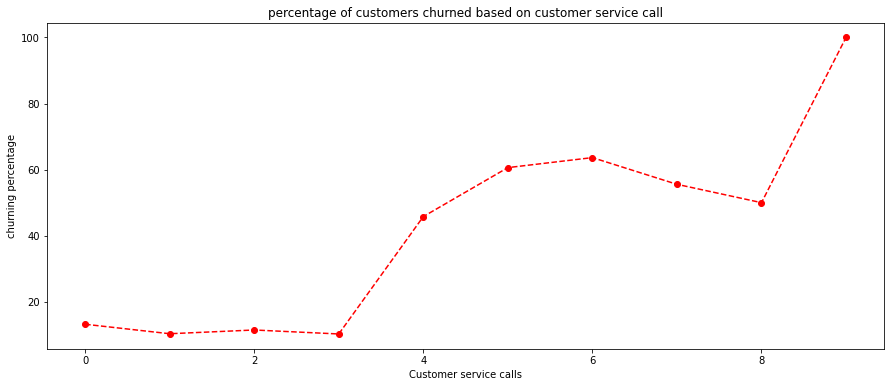

In [ ]:
telecom_cust_serv_calls['percentage_churning_customer_service_calls'].plot(color = 'red',linestyle = '--',marker = 'o')
plt.title("percentage of customers churned based on customer service call")
plt.ylabel("churning percentage")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


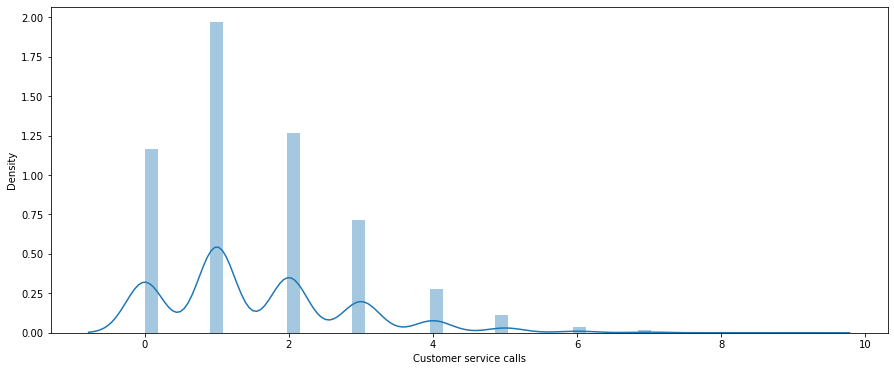

In [ ]:
sns.distplot(telecom['Customer service calls'],hist=True)

If the customer service calls are greater than 3, then percentage of churn become more than 45%

#International plan

In [ ]:
#calculating total number of International customers
intl_plan_cust = telecom['International plan'].value_counts()
print(intl_plan_cust)

No     3010
Yes     323
Name: International plan, dtype: int64


Text(0.5, 1.0, 'International Plan')

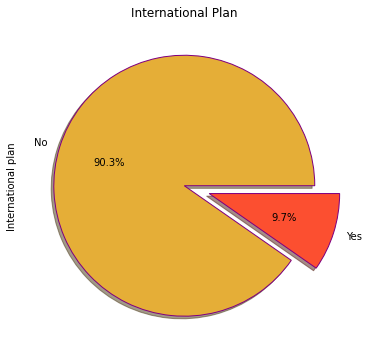

In [ ]:
intl_plan_cust.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'purple'},colors = ['#e5ae37','#fc4f30'],explode = [0,0.2],shadow = True)
plt.title("International Plan")

only 9.7% of the customers have international plan

In [ ]:
telecom_international_plan = telecom.groupby('International plan')['Churn'].value_counts().unstack()

In [ ]:
telecom_international_plan['percenatge_churning'] = telecom_international_plan.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
telecom_international_plan

Churn,False,True,percenatge_churning
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


Customers who has subscribed to international plan have a churning of 42%. Customers who have no international plan have only 11% churning.






Text(0.5, 1.0, 'churning count of customers with and without international plan')

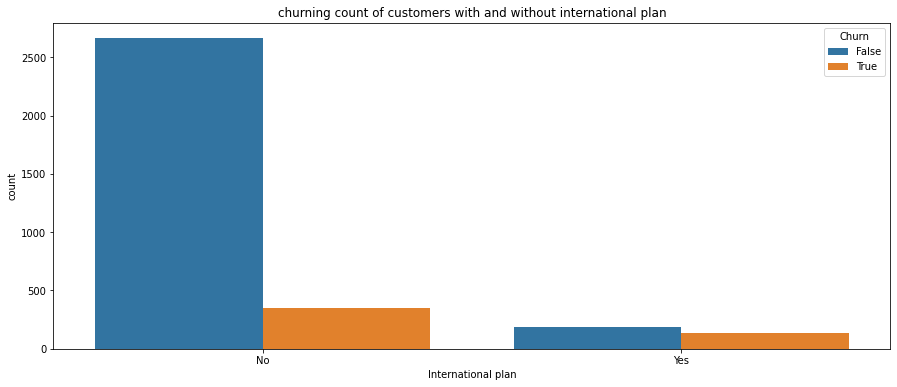

In [ ]:
sns.countplot(x = 'International plan',hue = 'Churn',data = telecom)
plt.title("churning count of customers with and without international plan")

This indicates that customers having international plan has very high churning percentage when compared with customers having domestic plan

In [ ]:
telecom[(telecom['International plan']=='No') & (telecom['Total intl calls']!=0)].head().T

,0,1,2,6,8
State,KS,OH,NJ,MA,LA
Account length,128,107,137,121,117
Area code,415,415,415,510,408
International plan,No,No,No,No,No
Voice mail plan,Yes,Yes,No,Yes,No
Number vmail messages,25,26,0,24,0
Total day minutes,265.1,161.6,243.4,218.2,184.5
Total day calls,110,123,114,88,97
Total day charge,45.07,27.47,41.38,37.09,31.37
Total eve minutes,197.4,195.5,121.2,348.5,351.6


This indicates that people who donot have international plan can also make international calls

#Total International Calls

In [ ]:
telecom3 = telecom.loc[:,['Total intl calls','Churn']]

In [ ]:
telecom3.head()

,Total intl calls,Churn
0,3,False
1,3,False
2,5,False
3,7,False
4,3,False


In [ ]:
telecom3['Total intl calls'].value_counts().sort_values()

17      1
19      1
20      1
16      2
18      3
14      6
15      7
13     14
12     15
0      18
11     28
10     50
9     109
8     116
1     160
7     218
6     336
5     472
2     489
4     619
3     668
Name: Total intl calls, dtype: int64

In [ ]:
telecom3['Total intl calls'].max()

20

In [ ]:
telecom3['intl calls category'] = pd.cut(telecom3['Total intl calls'],bins = [-1,0,5,10,15,20],labels = ['0','1-5','6-10','11-15','16-20'])

In [ ]:
telecom3.head()

,Total intl calls,Churn,intl calls category
0,3,False,1-5
1,3,False,1-5
2,5,False,1-5
3,7,False,6-10
4,3,False,1-5


In [ ]:
telecom_intl_calls = telecom.groupby('Total intl calls')['Churn'].value_counts().unstack()
telecom_intl_calls

Churn,False,True
Total intl calls,,
0,18.0,NaN
1,129.0,31.0
2,381.0,108.0
3,570.0,98.0
4,540.0,79.0
5,419.0,53.0
6,293.0,43.0
7,191.0,27.0
8,105.0,11.0


In [ ]:
telecom_intl_calls.fillna(0,inplace = True)

In [ ]:
telecom_intl_calls

Churn,False,True
Total intl calls,,
0,18.0,0.0
1,129.0,31.0
2,381.0,108.0
3,570.0,98.0
4,540.0,79.0
5,419.0,53.0
6,293.0,43.0
7,191.0,27.0
8,105.0,11.0


In [ ]:
telecom_intl_calls['Percenatge_churning_intl_calls'] = telecom_intl_calls.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)

In [ ]:
telecom_intl_calls

Churn,False,True,Percenatge_churning_intl_calls
Total intl calls,,,
0,18.0,0.0,0.000000
1,129.0,31.0,19.375000
2,381.0,108.0,22.085890
3,570.0,98.0,14.670659
4,540.0,79.0,12.762520
5,419.0,53.0,11.228814
6,293.0,43.0,12.797619
7,191.0,27.0,12.385321
8,105.0,11.0,9.482759


In [ ]:
telecom_intl_calls['Percenatge_churning_intl_calls'].plot(color = 'yellow',linestyle = '--',marker = 's')

Total international rate is the charge of international calls per minutes. For example, a person calls for 10 minutes it is 3 dollars then for calling 1 minute is 3/10= 0.3 dollar

if the international rate was same with   respect to a person with an international plan or not 

# Voice mail plan

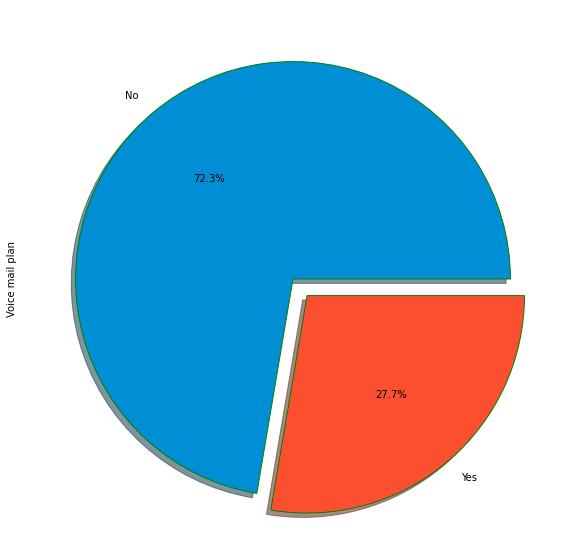

In [ ]:
# calculating the total number of users having voice mail plan

telecom['Voice mail plan'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'green'},explode = [0,0.1], colors = ['#008fd5','#fc4f30'],shadow = True)

In [ ]:
telecom_voice_mail_plan = telecom.groupby('Voice mail plan')['Churn'].value_counts().unstack()
telecom_voice_mail_plan

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


The churning percenatge is found to be higher for those consumers who donot have voice mail plan

#number v mail messages

In [ ]:
telecom['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


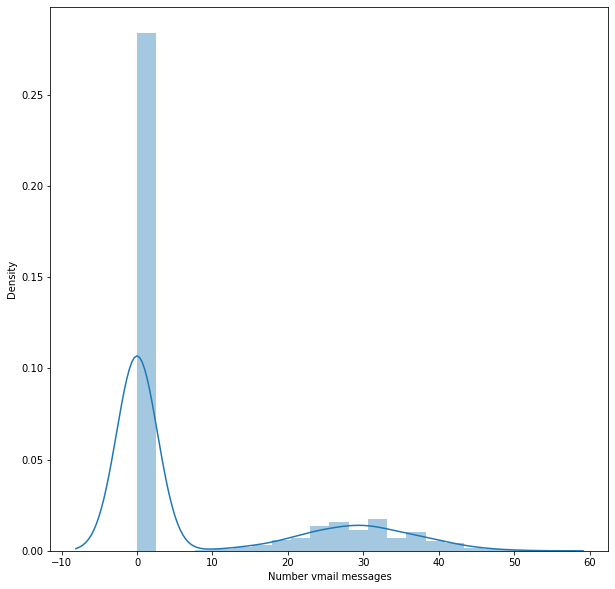

In [ ]:
sns.distplot(telecom['Number vmail messages'],hist=True)

#Total day,evening,night minutes

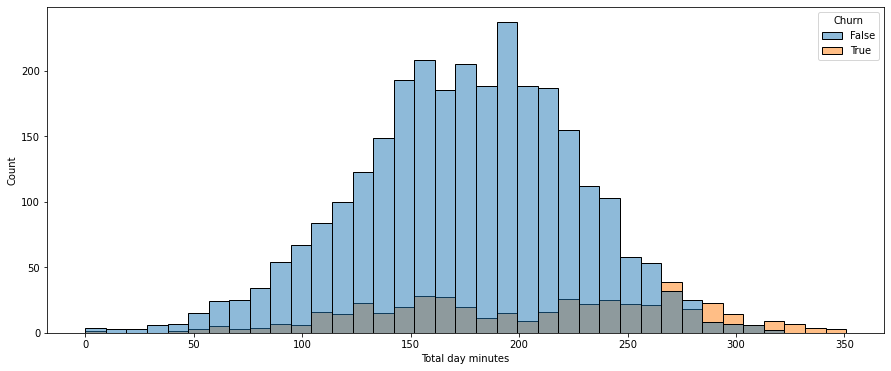

In [ ]:
sns.histplot(x = 'Total day minutes',hue = 'Churn',data = telecom)

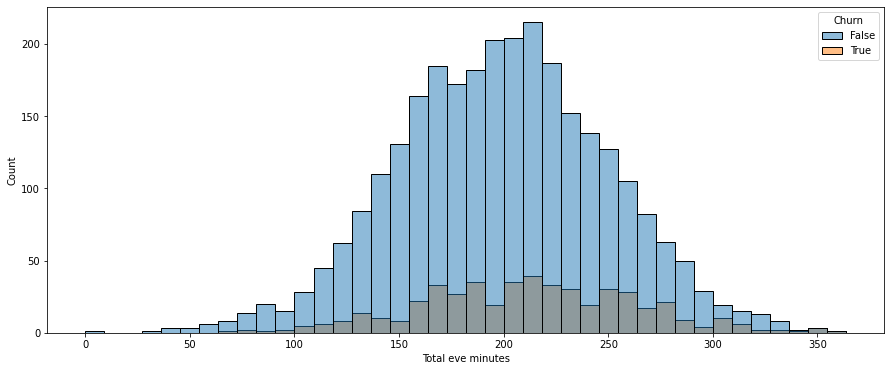

In [ ]:
sns.histplot(x = 'Total eve minutes',hue = 'Churn',data = telecom)

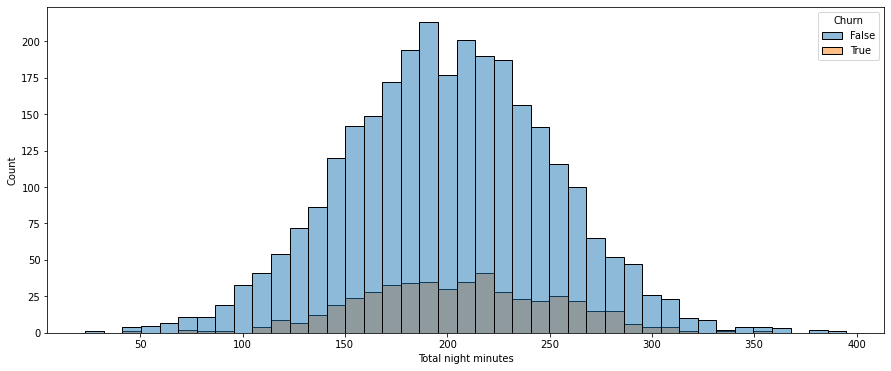

In [ ]:
sns.histplot(x = 'Total night minutes',hue = 'Churn',data = telecom)

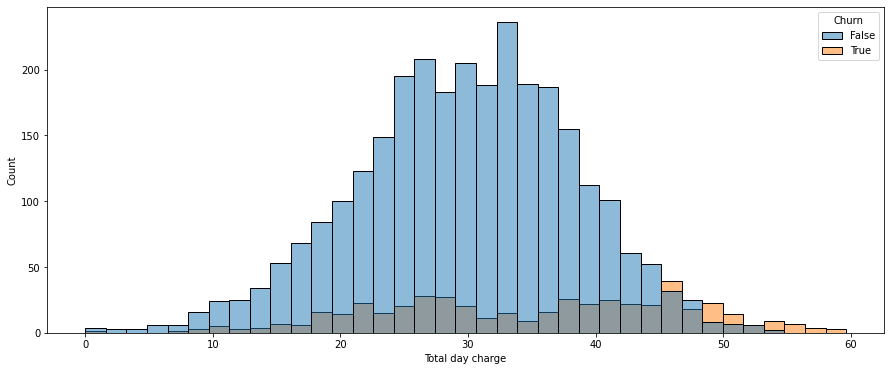

In [ ]:
sns.histplot(x = 'Total day charge',hue = 'Churn',data = telecom)

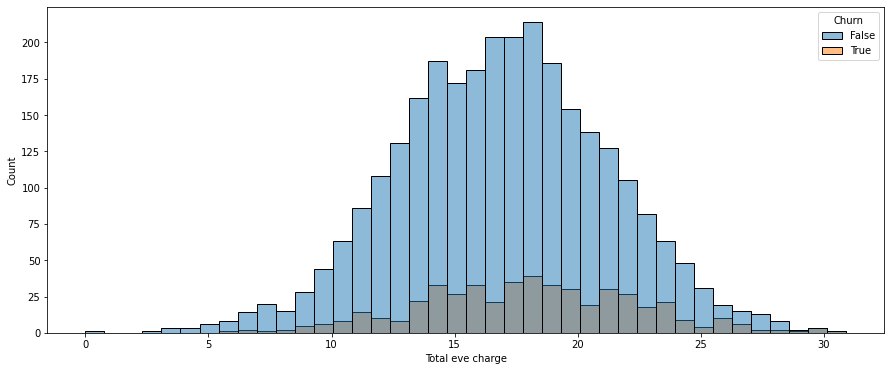

In [ ]:
sns.histplot(x = 'Total eve charge',hue = 'Churn',data = telecom)

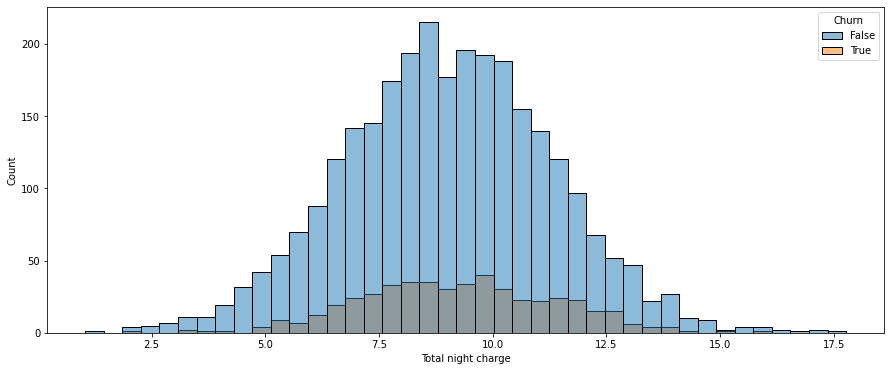

In [ ]:
sns.histplot(x = 'Total night charge',hue = 'Churn',data = telecom)

In [ ]:
telecom_state_call_minutes = telecom.groupby('State').agg({'Total day minutes':'mean','Total eve minutes':'mean','Total night minutes':'mean'}).rename(columns = {'Total day minutes':'Mean Total day minutes','Total eve minutes':'Mean Total eve minutes','Total night minutes':'Mean Total night minutes'}).reset_index()

In [ ]:
telecom_state_call_minutes

,State,Mean Total day minutes,Mean Total eve minutes,Mean Total night minutes
0,AK,178.384615,184.282692,192.326923
1,AL,186.010000,195.462500,187.285000
2,AR,176.116364,201.047273,205.454545
3,AZ,171.604688,187.748437,194.004687
4,CA,183.564706,198.970588,198.508824
5,CO,178.712121,206.884848,189.898485
6,CT,175.140541,203.828378,205.997297
7,DC,171.379630,196.272222,206.348148
8,DE,174.583607,208.247541,203.900000
9,FL,179.533333,210.276190,196.147619


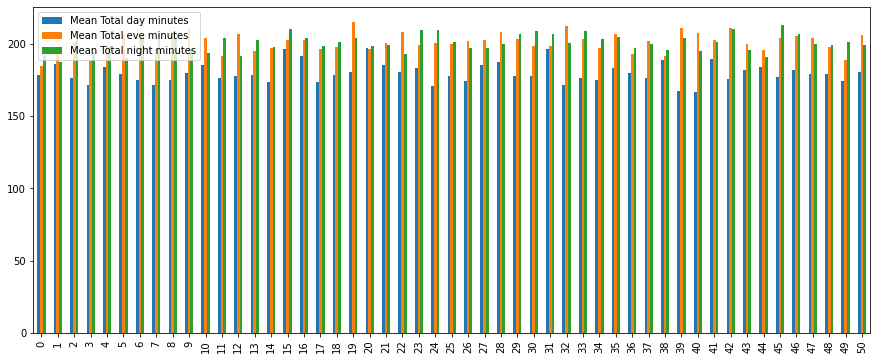

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
telecom_state_call_minutes.plot(kind = 'bar')

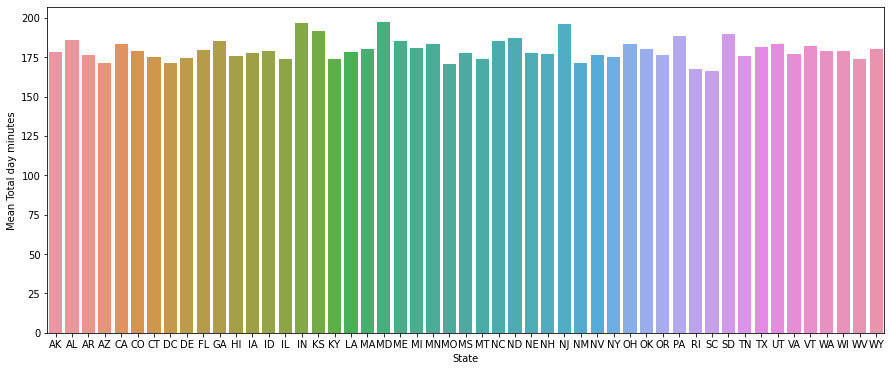

In [ ]:
sns.barplot(x = 'State',y = 'Mean Total day minutes',data = telecom_state_call_minutes)

New Dataset after exploratory data analysis

In [ ]:
new_telecom_1 = telecom.replace(r'Yes',1)

In [ ]:
new_telecom_2 = new_telecom_1.replace(r'No',0)

In [ ]:
new_telecom_2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
new_telecom_2.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


#Correlation Heatmap

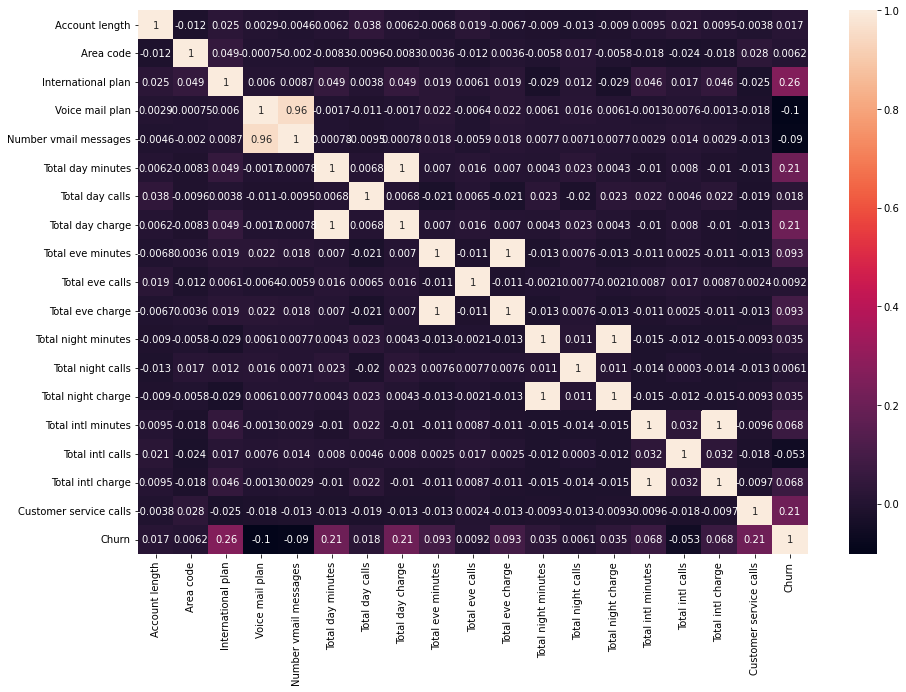

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(new_telecom_2.corr(),annot = True)


#correlation heat map by selected columns

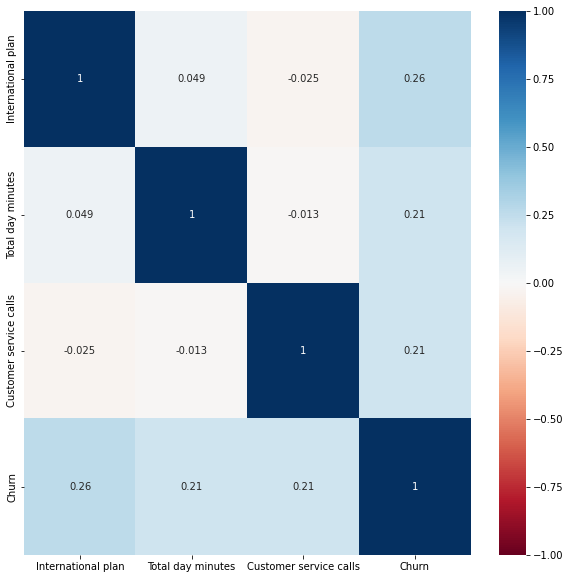

In [ ]:
new_telecom_2_selected = new_telecom_2[['International plan','Total day minutes','Customer service calls','Churn']]
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(new_telecom_2_selected.corr(),annot = True,cmap = 'RdBu',vmin = -1,vmax = 1)